In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

df = pd.read_csv(r'/content/drive/MyDrive/Upper limb/alldata_up1.txt')
print(df)

      Elbow_theta  ShFE_theta  ShAA_theta  Elbow_tao  ShFE_tao  ShAA_tao
0          0.0000      0.0000     0.00000   0.000000    0.0000   0.00000
1          0.0000      0.0000     0.00000   0.000018    0.0000   0.00000
2          0.0000      0.0000     0.00000   0.000074    0.0000   0.00000
3          0.0000      0.0000     0.00000   0.000166    0.0000   0.00000
4          0.0000      0.0000     0.00000   0.000294    0.0000   0.00000
...           ...         ...         ...        ...       ...       ...
8724       1.5142      1.1184    -0.01885   2.624700    4.8517   0.63967
8725       1.5205      1.1184    -0.01885   2.633800    4.8611   0.64710
8726       1.5205      1.1184    -0.01885   2.642900    4.8705   0.65456
8727       1.5268      1.1247    -0.01885   2.652000    4.8799   0.66206
8728       1.5331      1.1247    -0.01885   2.661000    4.8892   0.66960

[8729 rows x 6 columns]


In [ ]:
import numpy as np 

In [ ]:
dataset = df.to_numpy()
dataset

array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.8358e-05,  0.0000e+00,
         0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  7.3671e-05,  0.0000e+00,
         0.0000e+00],
       ...,
       [ 1.5205e+00,  1.1184e+00, -1.8850e-02,  2.6429e+00,  4.8705e+00,
         6.5456e-01],
       [ 1.5268e+00,  1.1247e+00, -1.8850e-02,  2.6520e+00,  4.8799e+00,
         6.6206e-01],
       [ 1.5331e+00,  1.1247e+00, -1.8850e-02,  2.6610e+00,  4.8892e+00,
         6.6960e-01]])

In [ ]:
x = dataset [:,0:3]
y = dataset [:,3:6]

In [ ]:
x

array([[ 0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ],
       ...,
       [ 1.5205 ,  1.1184 , -0.01885],
       [ 1.5268 ,  1.1247 , -0.01885],
       [ 1.5331 ,  1.1247 , -0.01885]])

In [ ]:
x.shape

(8729, 3)

In [ ]:
y.shape

(8729, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
y_train.shape

(6983, 3)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [ ]:
etr = ExtraTreesRegressor(n_estimators=50)
etr.fit(X_train, y_train)
score = etr.score(X_train, y_train)
print("Score: ", score)

Score:  0.9978491984104272


In [ ]:
cv_scores = cross_val_score(etr, X_train, y_train, cv = 10)
print("Mean cross-validataion score: %.2f" % cv_scores.mean())

Mean cross-validataion score: 1.00


In [ ]:
ypred = etr.predict(X_val)
mse = mean_squared_error(y_val, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % mse**(0.5))
etr.score(X_val, y_val)

MSE: 0.02
RMSE: 0.15


0.9954739363222028

In [ ]:
ypred = etr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % mse**(0.5))


MSE: 0.01
RMSE: 0.12


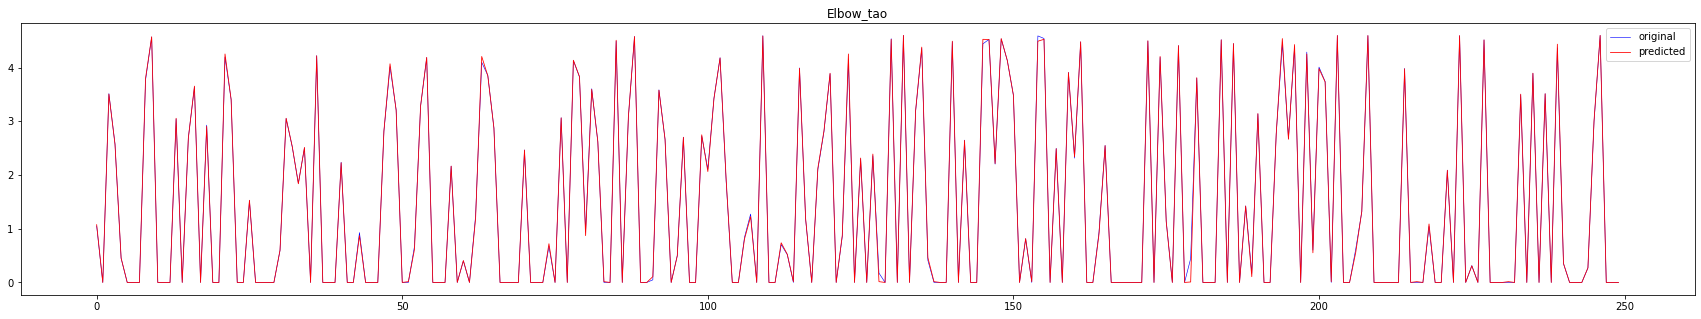

In [ ]:
limit = 250
x_ax = range(limit)
plt.figure(figsize=(30, 5))
plt.plot(x_ax, y_test[:limit,0], lw=0.6, color="blue", label="original")
plt.plot(x_ax, ypred[:limit,0], lw=0.8, color="red", label="predicted")
plt.title("Elbow_tao")
plt.legend()
plt.show()

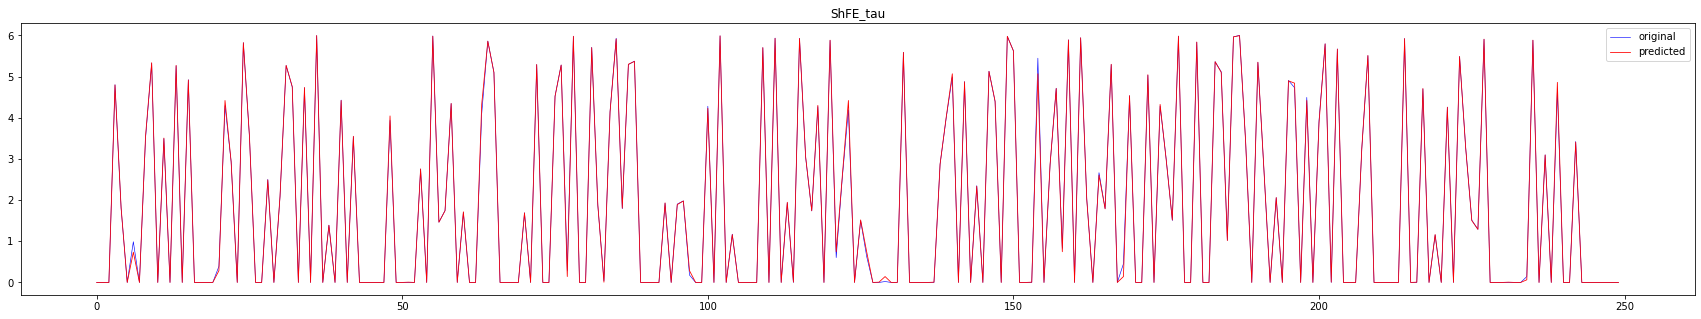

In [ ]:
x_ax = range(limit)
plt.figure(figsize=(30, 5))
plt.plot(x_ax, y_test[:limit,1], lw=0.6, color="blue", label="original")
plt.plot(x_ax, ypred[:limit,1], lw=0.8, color="red", label="predicted")
plt.title("ShFE_tau")
plt.legend()
plt.show()

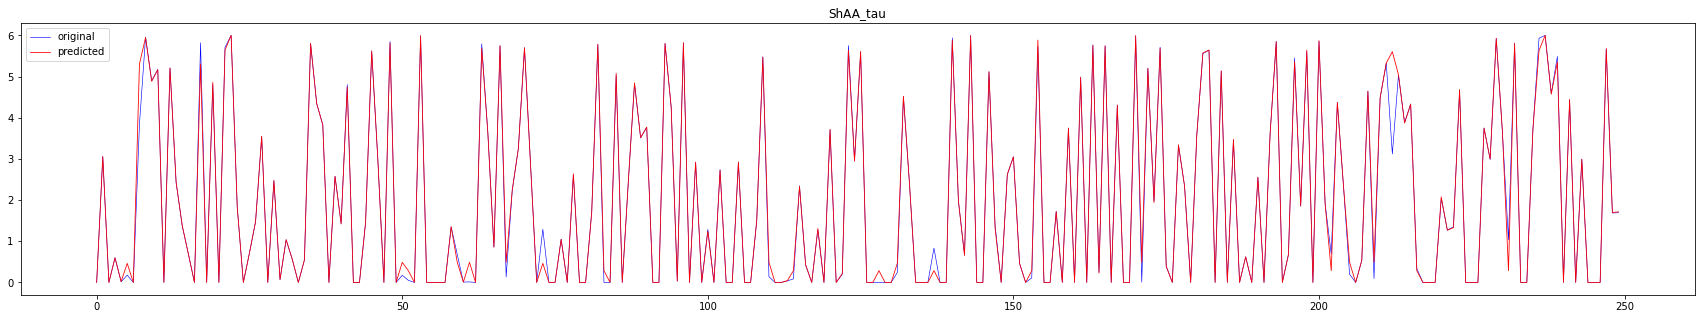

In [ ]:
x_ax = range(limit)
plt.figure(figsize=(30, 5))
plt.plot(x_ax, y_test[:limit,2], lw=0.6, color="blue", label="original")
plt.plot(x_ax, ypred[:limit,2], lw=0.8, color="red", label="predicted")
plt.title("ShAA_tau")
plt.legend()
plt.show()

In [ ]:
etr.score(X_test, y_test)

0.9969909710644892

In [ ]:
df2 = df.mean(axis=0)

In [ ]:
df2

Elbow_theta    0.768458
ShFE_theta     0.517555
ShAA_theta     0.489417
Elbow_tao      1.516110
ShFE_tao       2.075894
ShAA_tao       1.972651
dtype: float64